### Project analyzes soil data received from sensors. Our main goal is to compare data and see which one is more reliable for measurements. We will also find correlation between our features and see how temperature affects reduction of moisture. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
list_data = ['L10_switch4', 'L11_switch4', 'L13_sensor123','L23_sensor123', 'L03_sensor003', 'L14_sensor003']

data = {}
for i in list_data:
    value = pd.read_csv('datasets/{}.csv'.format(i))
    data[i] = value
    
for key, value in data.items():
    print('{}\n{}\n'. format(key, data[key].head(3)))

L10_switch4
     Moisture  Soil_temp         EC                 time
0  21007502.0      21.75  3697675.0  2020-10-28 12:47:07
1  21013755.0      21.75  3697738.0  2020-10-28 12:47:25
2  21012381.0      21.75  3698120.0  2020-10-28 12:47:31

L11_switch4
     Moisture  Soil_temp         EC                 time
0  21287378.0      22.06  3697202.0  2020-10-05 15:01:35
1  21287378.0      22.06  3696634.0  2020-10-05 15:01:47
2  21284758.0      22.06  3696690.0  2020-10-05 15:01:53

L13_sensor123
     Moisture  Soil_temp  Air_Hum  Air_temp          EC                 time
0  21444978.0      20.18        0         0  20381229.0  2020-10-13 16:40:05
1  21442561.0      20.31        0         0  20380214.0  2020-10-14 09:22:48
2  21420624.0      19.68        0         0  20368888.0  2020-10-14 09:30:57

L23_sensor123
     Moisture  Soil_temp  Air_Hum  Air_temp          EC                 time
0  21548264.0      21.56        0         0  20543416.0  2020-10-28 10:55:58
1  21548590.0      21.62   

---
Some soils have additional columns of Air_Hum and Ai_temp. These features were not measured so we can drop them. 

---

In [3]:
# drop Air_Hum, Air_temp columns

drop_data = ['L13_sensor123', 'L23_sensor123', 'L03_sensor003']

for i in drop_data:
    data[i] = data[i].drop(['Air_Hum', 'Air_temp'], axis = 1)

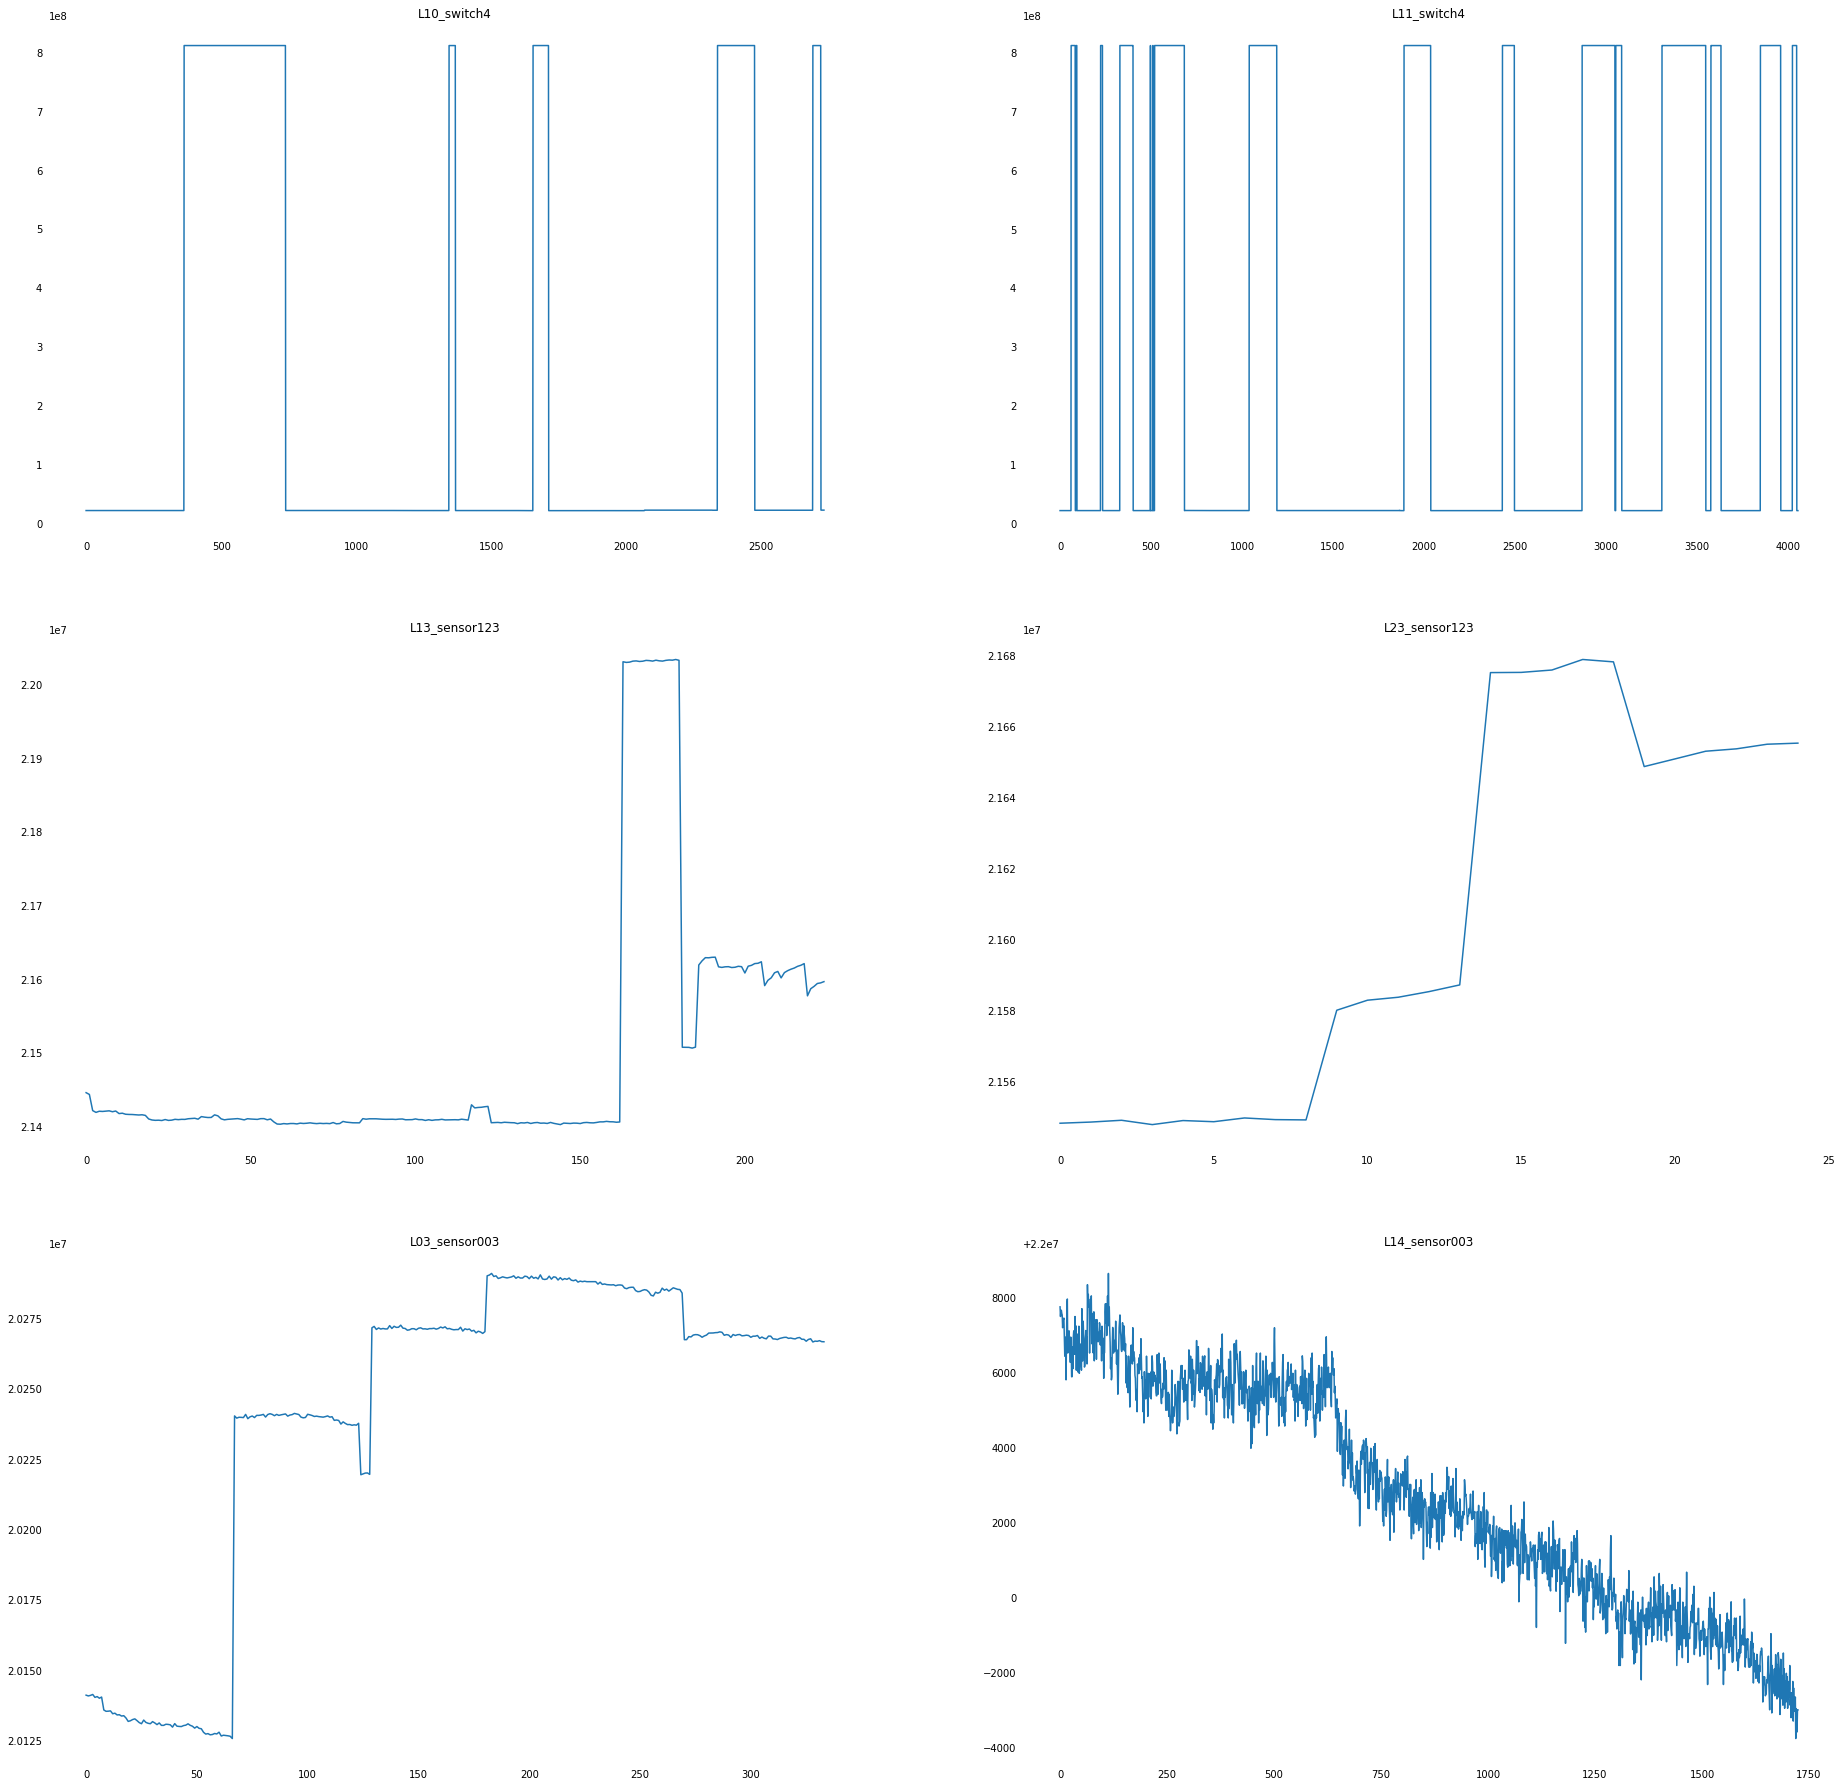

In [4]:
fig = plt.figure(figsize = (32, 32))

for i in range(0,6):
    ax = fig.add_subplot(3,2,i+1)

    ax.plot(data[list_data[i]]['Moisture'], label = 'Moisture')
    ax.set_title(list_data[i])
    for key in ax.spines:
        ax.spines[key].set_visible(False)
    ax.tick_params(bottom = False, top = False, left = False, right = False)



---
We can see from graphs of moisture above, that sensors usually send same values apart from switch4 which values jump too high. We can observe this pattern with any data measured by switch4 and below we can see big difference between minimal and maximal values.  

---

In [5]:
print('Moisture L10_switch4\n\nmin: {}\nmax: {}'.format(data['L10_switch4']['Moisture'].min(), data['L10_switch4']['Moisture'].max()))


Moisture L10_switch4

min: 20825129.0
max: 810942143.0


---  
We will focus on sensor 003, which data is more meaningful and sufficient.  
In next screen we can see plots of all features for sensor003  

---

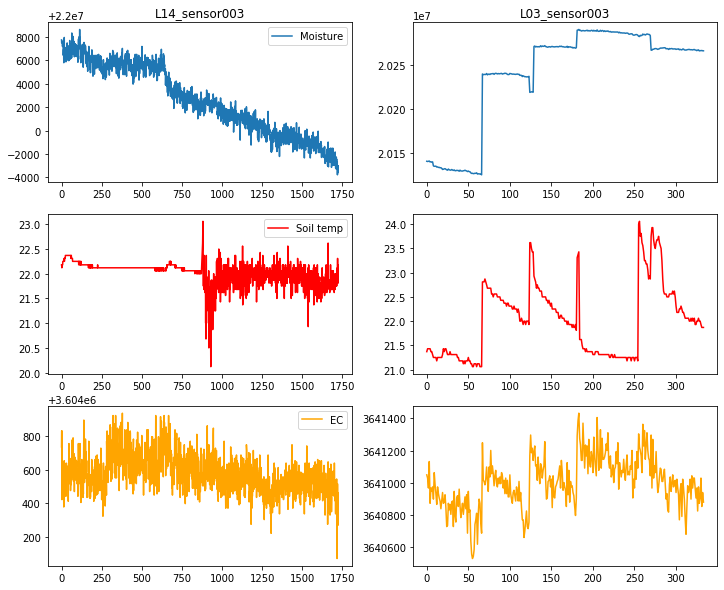

In [14]:
def plot_sensor003():    
    fig = plt.figure(figsize = (12, 10))
    plt.subplot(3,2,1)
    plt.plot(data['L14_sensor003']['Moisture'], label = 'Moisture')
    plt.title('L14_sensor003')
    plt.legend()

    plt.subplot(3,2,2)
    plt.plot(data['L03_sensor003']['Moisture'], label = 'Moisture')
    plt.title('L03_sensor003')

    plt.subplot(3,2,3)
    plt.plot(data['L14_sensor003']['Soil_temp'], c = 'red', label = 'Soil temp')
    plt.legend()

    plt.subplot(3,2,4)
    plt.plot(data['L03_sensor003']['Soil_temp'], c = 'red', label = 'Soil temp')

    plt.subplot(3,2,5)
    plt.plot(data['L14_sensor003']['EC'], c = 'orange', label = 'EC')
    plt.legend()

    plt.subplot(3,2,6)
    plt.plot(data['L03_sensor003']['EC'], c = 'orange', label = 'EC')
    return fig

sensor003 = plot_sensor003()
                               

In [7]:
data['L14_sensor003']['Soil_temp'].describe()

count    1725.000000
mean       22.508991
std         8.670511
min         1.500000
25%        21.930000
50%        22.060000
75%        22.120000
max       247.000000
Name: Soil_temp, dtype: float64

In [8]:
high_temp = data['L14_sensor003'][data['L14_sensor003']['Soil_temp'] > 30]
high_temp

,Moisture,Soil_temp,EC,time
873,22002357.0,197.18,3604586.0,2020-10-09 12:47:15
874,22002107.0,101.50,3604470.0,2020-10-09 12:47:26
875,22002190.0,47.43,3604545.0,2020-10-09 12:47:39
876,22002740.0,127.93,3604620.0,2020-10-09 12:47:51
877,22002065.0,127.93,3604586.0,2020-10-09 12:48:04
878,22002357.0,127.93,3604545.0,2020-10-09 12:48:16
882,22002190.0,247.00,3604558.0,2020-10-09 12:49:03
883,22002149.0,107.25,3604592.0,2020-10-09 12:49:14


In [9]:
low_temp = data['L14_sensor003'][data['L14_sensor003']['Soil_temp'] < 20]
low_temp

,Moisture,Soil_temp,EC,time
880,22001466.0,11.00,3604449.0,2020-10-09 12:48:39
919,22002656.0,13.31,3604729.0,2020-10-09 12:56:32
922,22002274.0,19.37,3604586.0,2020-10-09 12:57:07
925,22003422.0,16.68,3604729.0,2020-10-09 12:57:44
929,22002065.0,1.50,3604661.0,2020-10-09 12:58:30
931,22001807.0,11.93,3604572.0,2020-10-09 12:58:52
935,22002448.0,19.81,3604613.0,2020-10-09 12:59:53


In [10]:
data['L14_sensor003'] = data['L14_sensor003'][(data['L14_sensor003']['Soil_temp'] > 20) & (data['L14_sensor003']['Soil_temp'] < 30)]

In [11]:
data['L14_sensor003']['Soil_temp'].describe()

count    1710.000000
mean       22.017696
std         0.221172
min        20.120000
25%        21.930000
50%        22.060000
75%        22.120000
max        23.060000
Name: Soil_temp, dtype: float64

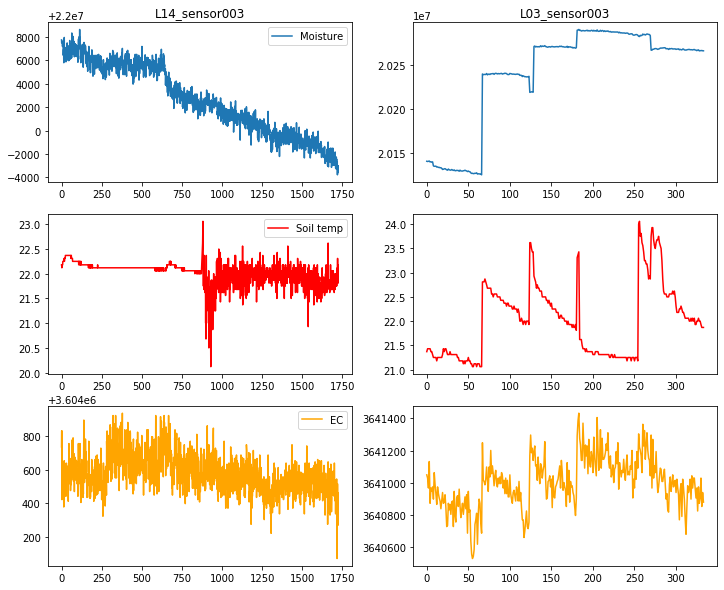

In [16]:
sensor003 = plot_sensor003()